In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import folium
data = pd.read_csv("cars.csv")
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


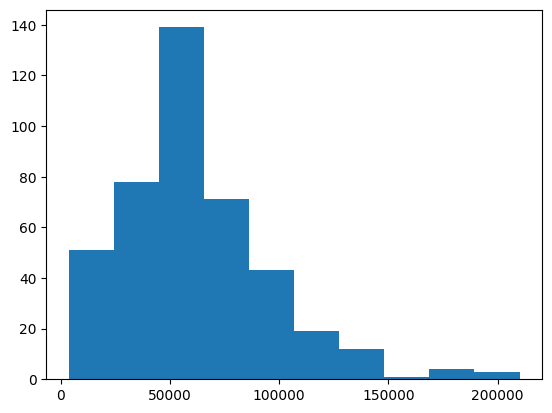

In [15]:
#количество машин с тем или иным пробегом, проданных в 2015 году
plt.hist((data[data["year"] == 2015])[['km_driven']])
plt.show()

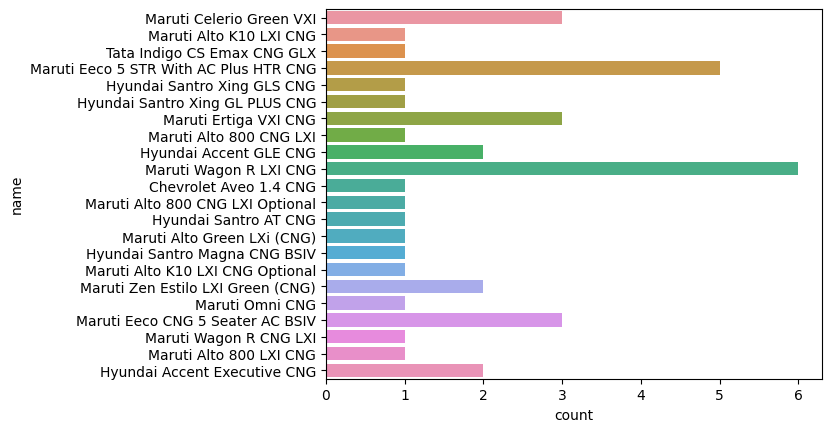

In [16]:
#количество машин с типом топлива CNG
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(y='name', data=data[data["fuel"] == "CNG"])
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_7508\453604731.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



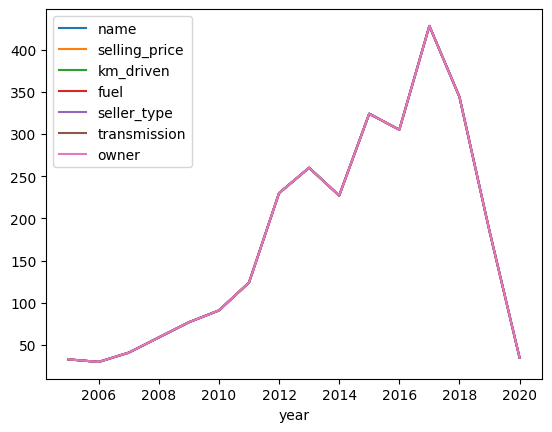

In [67]:
#количество проданных первыми владельцами машин с 2005
data[data["owner"]=="First Owner"][data["year"]>=2005].groupby(['year']).count().plot(kind='line');

In [18]:
#стоимость машин на ручном управлении по двигателям, 0 - квартиль мин, 4 мах, 2 мед
box_fig = px.violin(data[data["transmission"]=="Manual"], x='fuel', y='selling_price', box=True)#points="all"
box_fig.show()

In [19]:
def expen(value):
    if value >= 5000000:
        return 5
    elif value >= 1000000:
        return 4
    elif value >= 500000:
        return 3
    elif value <= 50000:
        return 1
    else: return 2

hyundai = data[data['name'].str.match('Hyundai')]["selling_price"].mean()
maruti = data[data['name'].str.match('Maruti')]["selling_price"].mean()
honda = data[data['name'].str.match('Honda')]["selling_price"].mean()
audi = data[data['name'].str.match('Audi')]["selling_price"].mean()
mercedes = data[data['name'].str.match('Mercedes')]["selling_price"].mean()

df = pd.DataFrame(dict(r=[expen(hyundai), expen(maruti), expen(honda), expen(audi), expen(mercedes)], theta=['hyundai','maruti','honda','audi', 'mercedes']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()

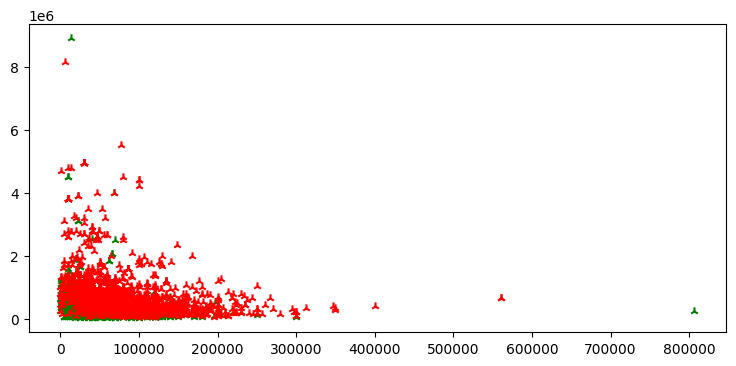

In [69]:
data_scat = data[data['name'].str.match('Audi')]
plt.figure(figsize = (9,4))
x_1 = data[data["fuel"] == "Petrol"]
x_2 =  data[data["fuel"] == "Diesel"]
plt.scatter(x = x_1["km_driven"], y = x_1["selling_price"], c = "green", marker = "2")
plt.scatter(x = x_2["km_driven"], y = x_2["selling_price"], c = "red", marker = "2")
plt.show()


<Axes: ylabel='date'>

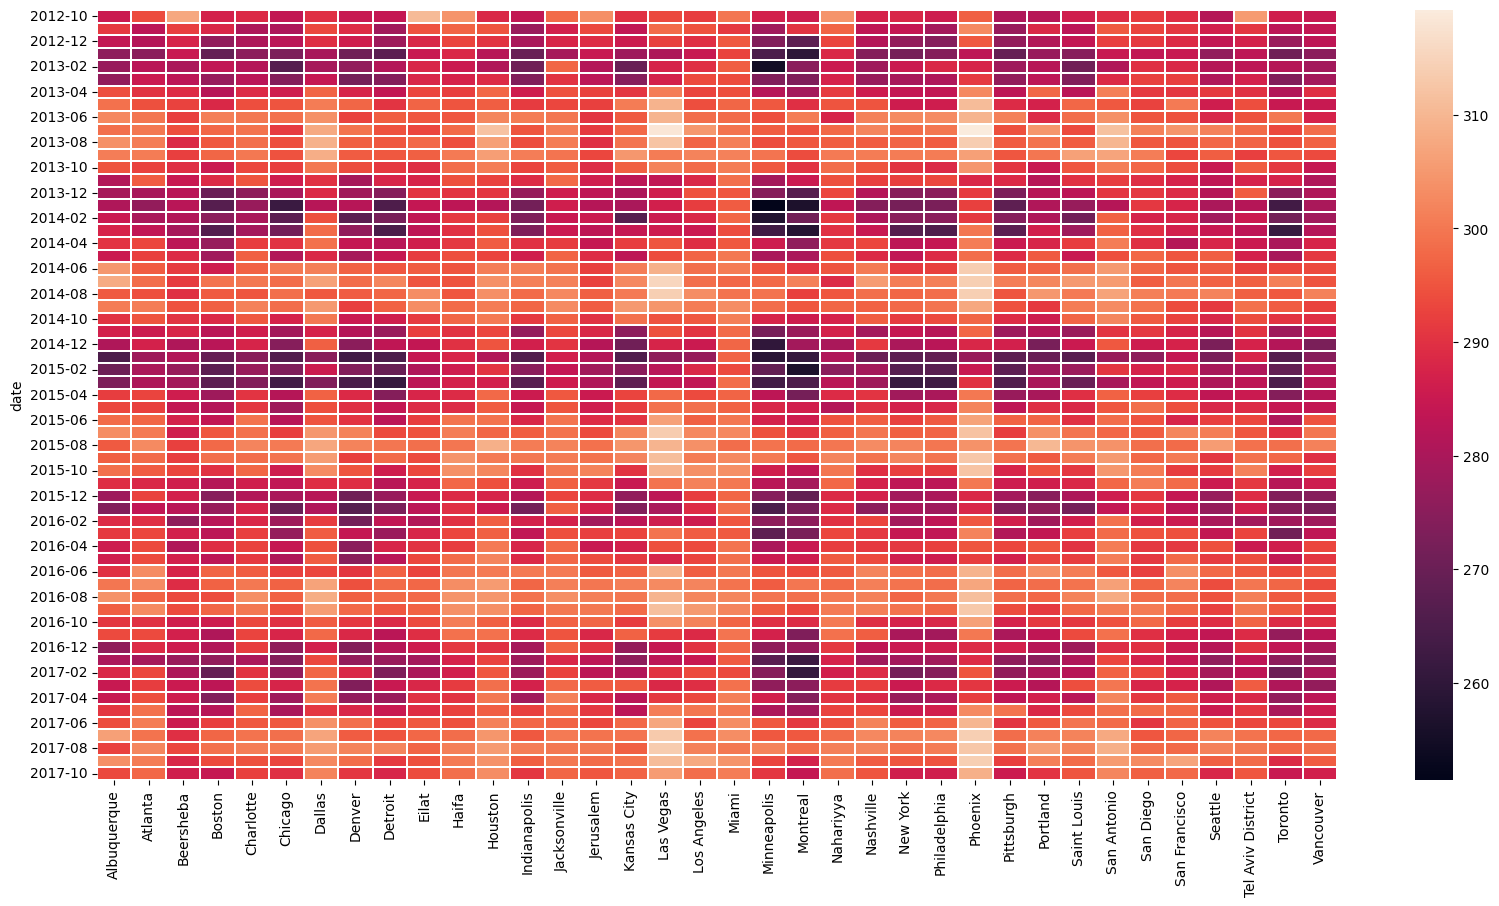

In [21]:
data2 = pd.read_csv("temperature.csv").dropna()
data2["date"] = data2['datetime'].map(lambda a: "-".join(a.split("-")[:2]))
data2  = data2.drop_duplicates(subset=['date']).drop(columns=["datetime"], axis =1)
df = data2.pivot_table(index="date")
plt.figure(figsize=(20,10))
sns.heatmap(df, linewidths=0.01)

In [22]:
data3 = pd.read_csv("elect.csv").drop(columns=["Source","Official/Unofficial","Vote for Highest Office (President)", "Total Ineligible Felon", "Parole", "Overseas Eligible", "State Abv", "Probation"], axis = 1).drop(0, axis =0)
data3["Prison"]= data3["Prison"].map(lambda x: x.replace(",","")).astype("int")
data3["Total Ballots Counted (Estimate)"] = data3["Total Ballots Counted (Estimate)"].map(lambda x: x.replace(",","")).astype("int")
#display(data3)
fig = go.Figure()
fig.add_trace(go.Scatter(x = data3["State"], y = data3["Prison"]))
fig.add_trace(go.Scatter(x = data3["State"], y = data3["Total Ballots Counted (Estimate)"]))
fig.update_layout(autosize=False,width=1500, height=1200, paper_bgcolor="LightSteelBlue")
fig.show()

In [23]:
import time
data4 = pd.read_csv("covid.csv").drop(columns=["Province/States","WHO region label"], axis =1)
data4 = data4[data4["WHO region"] == "European Region"][5:15]
data4 = data4.drop(columns="WHO region", axis=1).dropna(axis='columns')
cols = data4.columns[1:]
new_cols = {}
for col in cols:
    dt = time.strptime(col, '%m/%d/%y')
    new_cols[col] = time.strftime('%Y-%m-%d', dt)
    
data4 = data4.rename(columns=new_cols)
df4 = data4.pivot_table(columns="Country/Region")

fig = px.line(df4)
fig.update_layout(autosize=False,width=1500, height=800)
fig.show()


In [51]:
meteor_df = pd.read_csv('meteorites.csv')
meteor_df.drop(['id', 'name_type', 'class', 'geolocation', 'fall'], inplace=True, axis=1)
meteor_df.dropna(subset=['lat', 'long', 'mass', 'year'], inplace=True)
meteor_sample = meteor_df.sample(100).reset_index().drop(['index'], axis=1)
meteor_sample

,name,mass,year,lat,long
0,Acme,75000.00,1947.0,33.63333,-104.26667
1,Meteorite Hills 01232,7.60,2001.0,-79.68333,159.75000
2,Asuka 87268,10.24,1987.0,-72.00000,26.00000
3,Yamato 982464,5.02,1998.0,0.00000,0.00000
4,Meteorite Hills A78002,542.20,1978.0,-79.68333,155.75000
...,...,...,...,...,...
95,Bruno,13000.00,1931.0,52.26667,-105.35000
96,Yamato 790600,9.67,1979.0,-71.50000,35.66667
97,Yamato 790564,29.22,1979.0,-71.50000,35.66667
98,Algoma,4100.00,1887.0,44.65000,-87.46667


In [65]:
data5 =  pd.read_csv('terror.csv', encoding = "ISO-8859-1").drop(columns=["addnotes", "scite1","scite2", "scite3", "provstate", "region", "region_txt","country", "country_txt","extended","approxdate","ransomamt","ransomamtus","ransompaid","ransompaidus","INT_LOG","INT_IDEO"], axis =1)
data5 = data5.dropna(subset=["latitude", 'longitude', "location", "eventid"])
terrors = data5.sample(100).reset_index().drop(['index'], axis=1).dropna(axis='columns')
terrors

C:\Users\User\AppData\Local\Temp\ipykernel_7508\827403141.py:1: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,city,latitude,longitude,specificity,vicinity,location,...,gname,individual,claimed,weaptype1,weaptype1_txt,property,ishostkid,dbsource,INT_MISC,INT_ANY
0,201603150031,2016,3,15,Burgos,12.408223,123.753794,1.0,0,The incident occurred in Bautuan district.,...,New People's Army (NPA),0,0.0,6,Explosives,1,0.0,START Primary Collection,0,0
1,200903030016,2009,3,3,Baghdad,33.303566,44.371773,1.0,0,The attack took place in the Al Dar area of so...,...,Unknown,0,0.0,6,Explosives,-9,0.0,ISVG,0,-9
2,201408210015,2014,8,20,Tripoli,32.867867,13.189067,1.0,0,The incident occurred in the Andalus neighborhood,...,Unknown,0,0.0,6,Explosives,-9,0.0,START Primary Collection,0,-9
3,200406230005,2004,6,23,Oued Lahreche,36.215833,2.635833,1.0,0,Near Médéa; 90 KM south of Algiers,...,Algerian Islamic Extremists,0,0.0,13,Unknown,-9,0.0,UMD Algeria 2010-2012,0,0
4,201002210014,2010,2,21,Afir,36.833333,4.000000,1.0,0,The attack took place in Afir commune near Del...,...,Unknown,0,0.0,6,Explosives,-9,0.0,ISVG,0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,201502110040,2015,2,11,Cork,51.909217,-8.497344,1.0,0,The incident occurred in the Killala Gardens n...,...,Unknown,0,0.0,6,Explosives,0,0.0,START Primary Collection,0,-9
96,201709270010,2017,9,27,Rahaliyah,32.766426,43.389958,1.0,0,The incident occurred to the south of Ramadi.,...,Islamic State of Iraq and the Levant (ISIL),0,0.0,6,Explosives,-9,0.0,START Primary Collection,0,1
97,200908120011,2009,8,12,Karabudakhkentsky (District),42.692332,47.533398,3.0,0,The attack occurred near the Mozdok-Kazimagome...,...,Unknown,0,0.0,6,Explosives,0,0.0,ISVG,0,-9
98,201003270016,2010,3,27,Peshawar,34.006004,71.537430,1.0,1,"In Nasapa village, Peshawar, North West Fronti...",...,Unknown,0,0.0,6,Explosives,1,0.0,ISVG,0,-9


In [66]:
map = folium.Map((terrors.loc[50, 'latitude'], terrors.loc[50, 'longitude']), zoom_start=5)
for row in terrors.iterrows():        
    folium.Marker(location=(row[1]['latitude'], row[1]['longitude']),
                  tooltip=row[1]['eventid'], popup=row[1]['eventid']).add_to(map)
map